In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
airline_dataset = pd.read_excel('./EastWestAirlines.xlsx')
airline_dataset.head(10)

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   
5    6    16420           0          1          1          1            0   
6    7    84914           0          3          1          1        27482   
7    8    20856           0          1          1          1         5250   
8    9   443003           0          3          2          1         1753   
9   10   104860           0          3          1          1        28426   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
5            0                  0                0               6942       0  
6           25                  0                0               6994       0  
7            4                250                1               6938       1  
8           43               3850               12               6948       1  
9           28               1150                3               6931       1

In [6]:
airline_dataset.shape

(3999, 12)

In [7]:
airline_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airline_dataset.corr()

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
ID#                1.000000 -0.243737   -0.019374  -0.224465   0.020291   
Balance           -0.243737  1.000000    0.108722   0.338344  -0.008804   
Qual_miles        -0.019374  0.108722    1.000000   0.007931  -0.013923   
cc1_miles         -0.224465  0.338344    0.007931   1.000000  -0.068223   
cc2_miles          0.020291 -0.008804   -0.013923  -0.068223   1.000000   
cc3_miles         -0.014707  0.035243   -0.007779   0.060555  -0.006166   
Bonus_miles       -0.203012  0.403487    0.031021   0.825200  -0.003969   
Bonus_trans       -0.146915  0.324935    0.050725   0.608943   0.064399   
Flight_miles_12mo -0.031013  0.217551    0.126774   0.037370   0.010598   
Flight_trans_12   -0.052096  0.255700    0.144004   0.041333   0.028284   
Days_since_enroll -0.964988  0.263129    0.017312   0.230849  -0.005807   
Award?            -0.177901  0.178494    0.095256   0.335457   0.005332   

                   cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
ID#                -0.014707    -0.203012    -0.146915          -0.031013   
Balance             0.035243     0.403487     0.324935           0.217551   
Qual_miles         -0.007779     0.031021     0.050725           0.126774   
cc1_miles           0.060555     0.825200     0.608943           0.037370   
cc2_miles          -0.006166    -0.003969     0.064399           0.010598   
cc3_miles           1.000000     0.204134     0.097313          -0.001777   
Bonus_miles         0.204134     1.000000     0.603180           0.183536   
Bonus_trans         0.097313     0.603180     1.000000           0.377216   
Flight_miles_12mo  -0.001777     0.183536     0.377216           1.000000   
Flight_trans_12    -0.001117     0.185261     0.432364           0.869193   
Days_since_enroll   0.010832     0.210397     0.161262           0.037271   
Award?              0.023484     0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
ID#                      -0.052096          -0.964988 -0.177901  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

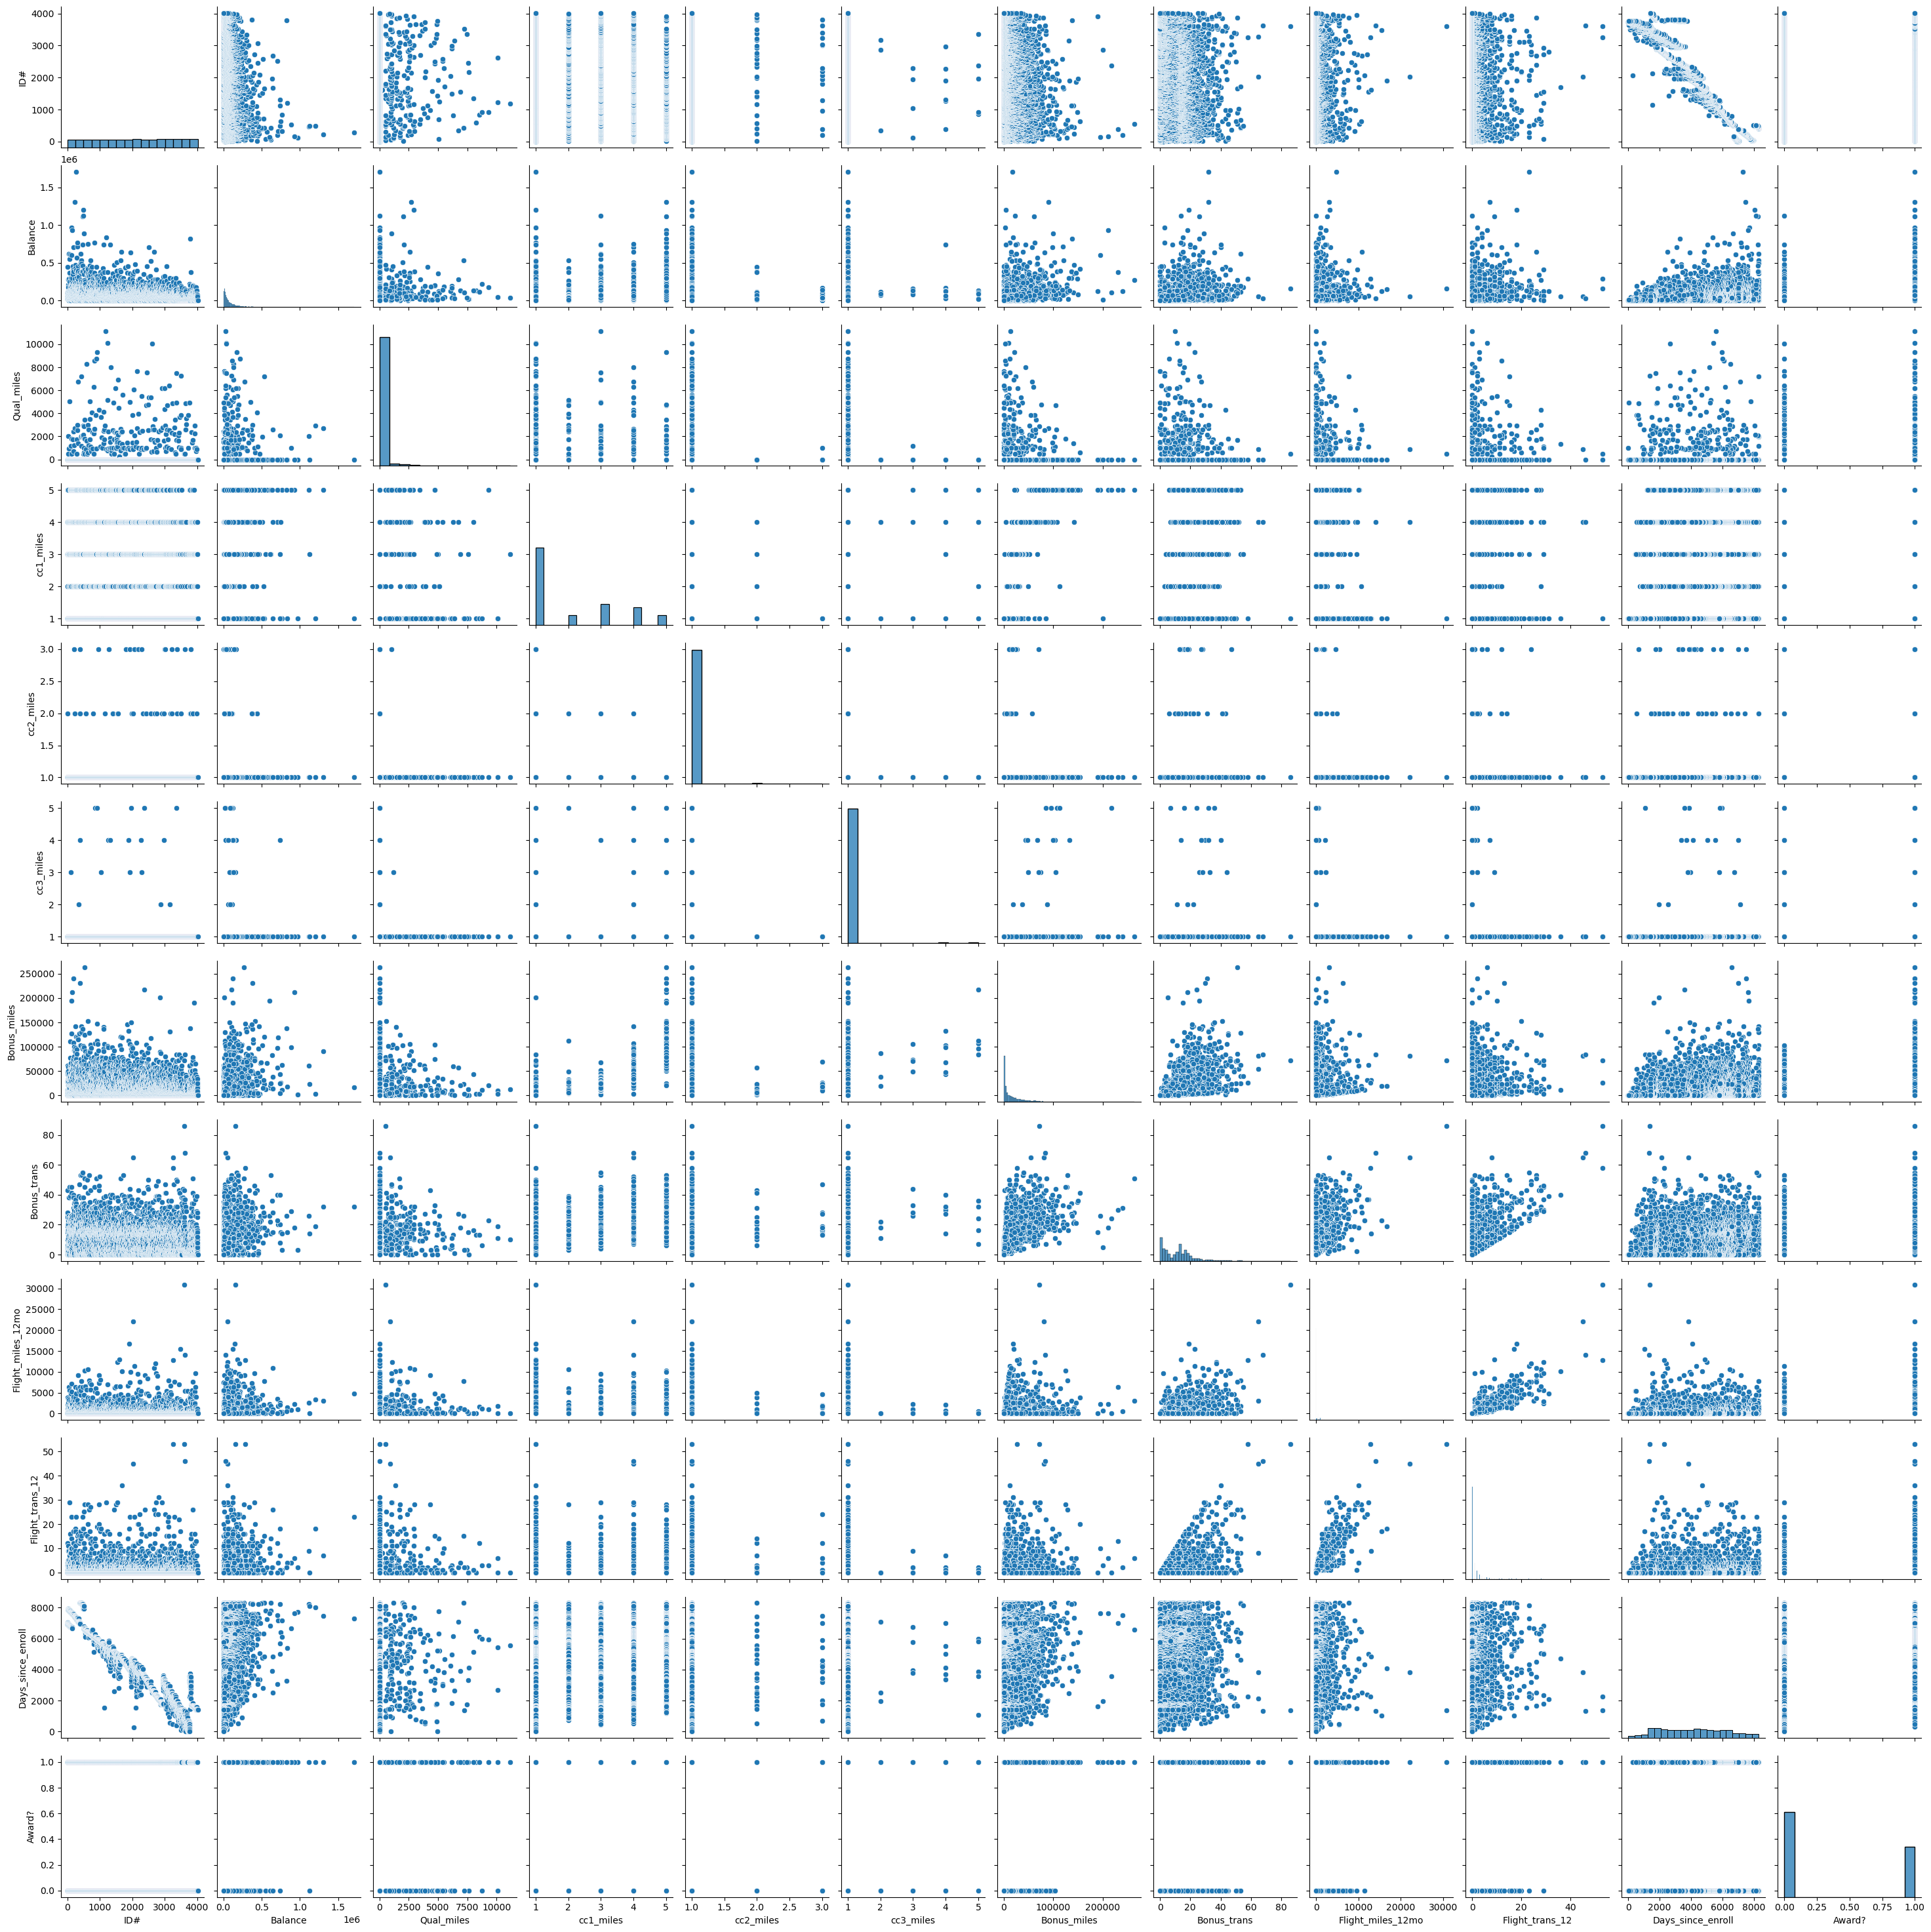

In [9]:
sns.pairplot(airline_dataset)

In [11]:
airline_dataset.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(airline_dataset)

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_dataset)
    wcss.append(kmeans.inertia_)

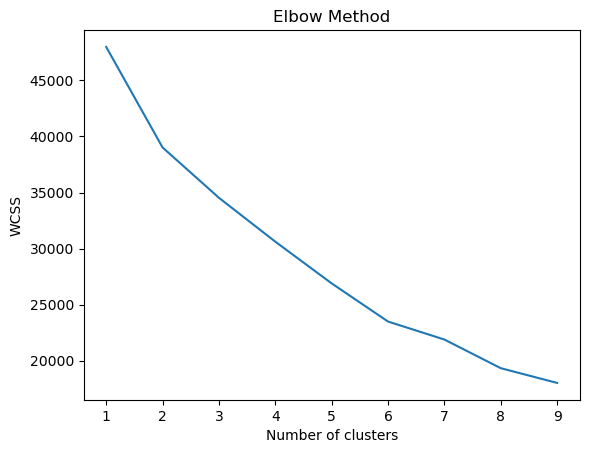

In [14]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
#Clustering the data
Glaxo_clusters_2 = KMeans(2, random_state=40)
Glaxo_clusters_2.fit(scaled_dataset)

KMeans(n_clusters=2, random_state=40)

In [28]:
Glaxo_clusters_2.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
glaxo_dataset['new_cluster_id'] = Glaxo_clusters_2.labels_

In [37]:
glaxo_dataset.head()

Date     Open     High      Low    Last    Close  \
0  2010-01-04  1613.00  1629.10  1602.00  1629.0  1625.65   
1  2010-01-05  1639.95  1639.95  1611.05  1620.0  1616.80   
2  2010-01-06  1618.00  1644.00  1617.00  1639.0  1638.50   
3  2010-01-07  1645.00  1654.00  1636.00  1648.0  1648.70   
4  2010-01-08  1650.00  1650.00  1626.55  1640.0  1639.80   

   Total Trade Quantity  Turnover (Lacs)  new_cluster_id  
0                9365.0           151.74               1  
1               38148.0           622.58               1  
2               36519.0           595.09               1  
3               12809.0           211.00               1  
4               28035.0           459.11               1

In [33]:
Glaxo_clusters_3 = KMeans(3, random_state=40)
Glaxo_clusters_3.fit(scaled_dataset)

KMeans(n_clusters=3, random_state=40)

In [34]:
Glaxo_clusters_3.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
glaxo_dataset_3 = glaxo_dataset

In [36]:
glaxo_dataset_3['new_cluster_id'] = Glaxo_clusters_3.labels_

In [38]:
glaxo_dataset_3.head()

Date     Open     High      Low    Last    Close  \
0  2010-01-04  1613.00  1629.10  1602.00  1629.0  1625.65   
1  2010-01-05  1639.95  1639.95  1611.05  1620.0  1616.80   
2  2010-01-06  1618.00  1644.00  1617.00  1639.0  1638.50   
3  2010-01-07  1645.00  1654.00  1636.00  1648.0  1648.70   
4  2010-01-08  1650.00  1650.00  1626.55  1640.0  1639.80   

   Total Trade Quantity  Turnover (Lacs)  new_cluster_id  
0                9365.0           151.74               1  
1               38148.0           622.58               1  
2               36519.0           595.09               1  
3               12809.0           211.00               1  
4               28035.0           459.11               1